<a href="https://colab.research.google.com/github/chminPark/ml-python/blob/master/%EC%8B%A4%EC%8A%B5_Clustering_%5B%ED%95%99%EC%83%9D%EC%9A%A9%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning (비지도학습)


 Unsupervised learning is type of learning algorithms that utilize unlabeled data to find commonalities/similarities among the data. Clustering is the most common type of unsupervised learning, so we will exercise this with MNIST data.
 MNIST data is  binary images of handwritten digits, and it has already labeled. Today, we will not use the label to cluster the data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load data from https://www.openml.org/d/554, it takes about a minute
X, T = fetch_openml('mnist_784', version=1, return_X_y=True)

# Extracting 0~4 digits
for i in range(5):
  temp_arr = X[T=='{}'.format(i)]
  temp_arr_T = T[T=='{}'.format(i)]
  try:
    X_part = np.vstack([X_part, temp_arr])
    T_part = np.concatenate([T_part, temp_arr_T])
  except:
    X_part = temp_arr
    T_part = temp_arr_T

In [ ]:
np.random.seed(1)
X_train, X_test, T_train, T_test = train_test_split(X_part, T_part, train_size=5000, test_size=1000, shuffle=True) # 5000 samples for clustering (we use only X_train)

#### 실습 : Scaling을 해야 한다 
scaler = ?????????
X_train_s = ??????????????????
X_test_s = ?????????

In [ ]:
# TSNE for visualization, it takes about 2~3 minutes
from sklearn.manifold import TSNE

model = TSNE(learning_rate=300, random_state=1)
TSNE_X = model.fit_transform(X_train_s) 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [ ]:
# Image plotting function
def img_plt(X_train, Y_train, n):
  X_train_2d = X_train.reshape(X_train.shape[0], 28, 28)
  fig, axes = plt.subplots(n, 10, figsize=(7.5,7.5))
  for j in range(n):
    for i in range(10):
        ax = axes[j, i]
        try:        
          ax.imshow(X_train_2d[Y_train==j][i], cmap='gray_r')
          ax.axis('off')
          if i == 0:
            ax.set_title('Cluster: {}'.format(j))
        except:
          ax.axis('off')
  
  plt.tight_layout()
  plt.show()

In [ ]:
# Visualization with TSNE
def vec_vis(x, y, T, n):
  plt.rcParams['figure.figsize'] = [20, 8]
  color_num = n
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 2, 1)
  ax2 = fig.add_subplot(1, 2, 2)

  xs = x[:,0]
  ys = x[:,1]
  ax1.set_title("t-SNE Visualization with Clustering")
  scatter = ax1.scatter(xs, ys, c=y, cmap=plt.get_cmap('rainbow', color_num))
  legend = ax1.legend(*scatter.legend_elements(), loc='upper right', title='Clusters')
  ax2.set_title("t-SNE Visualization with True label")
  scatter = ax2.scatter(xs, ys, c=list(map(int, T)), cmap=plt.get_cmap('rainbow', 5))
  legend = ax2.legend(*scatter.legend_elements(), loc='upper right', title='Labels')
  plt.show()

## Step 1-1. K-Means Clustering

Scikit을 이용하여 K-Means Clustring 을 수행합니다. 0~4 사이의 숫자만 존재하는 데이터이므로 K=5로 설정하겠습니다. 


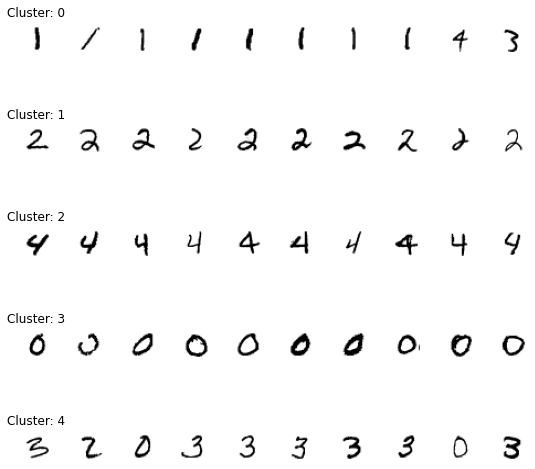

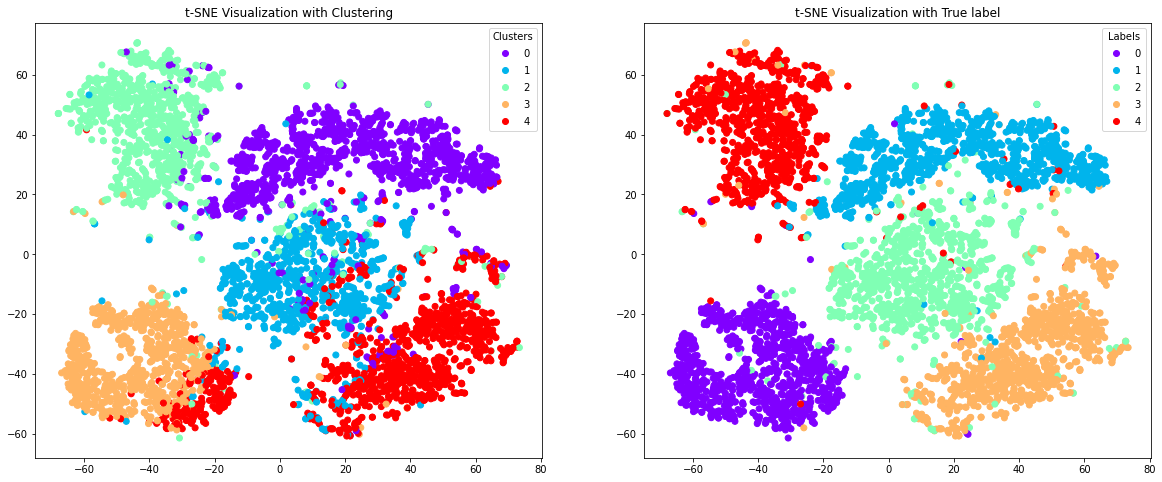

In [ ]:
n = 5 # number of clusters
### 실습 KMeans를 수행한다. 
model = ?????? # 'Kmeans' from 'sklearn.cluster', 'n_cluster' default=2
Y_train = ????????? # their clustering result using 'X_train_s' will be assigned to 'Y_train'

img_plt(X_train, Y_train, n) # plot
vec_vis(TSNE_X, Y_train, T_train, n) # visualize

## Step 1-2. Agglomerative Clustering

For agglomerative clustering, there are 4 linking criteria used in Sckikit-learn. : {"ward", "average", "complete", "single"} ("single" is newly added)

If you do not input the linking criterion, the default one is "ward". You can try other linking criteria.

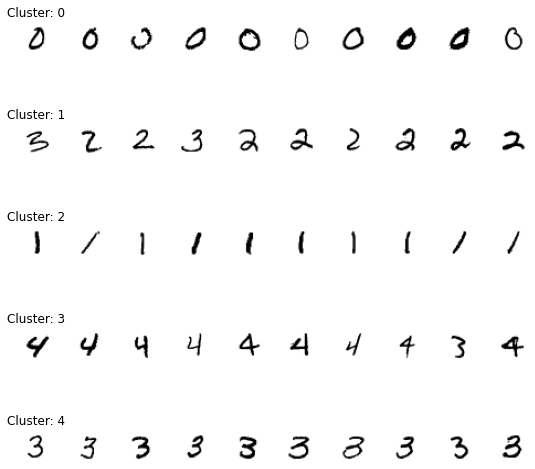

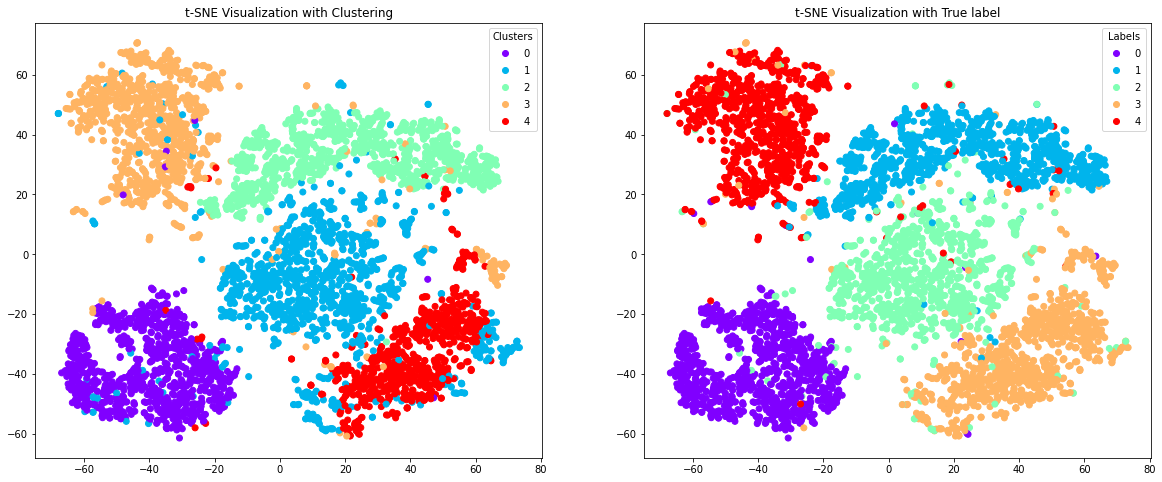

In [ ]:
n = 5 # number of clusters
#### 실습: Agglomerative Clustting을 수행한다
model = ?????  # 'Agglomerative Clustering' from 'sklearn.cluster'
Y_train = ????????? # their clustering result using 'X_train_s' will be assigned to 'Y_train'

img_plt(X_train, Y_train, n) # plot
vec_vis(TSNE_X, Y_train, T_train, n) # visualize

## Step 2. Clustering after dimension reduction using PCA

MNIST data is too high dimensional. - 784(28X28)
Because clustering algorithm we handled are based on Eucleadian distance, too high dimension make the model work poorly. To reduce the dimension of the data, we will use PCA which we have studied last time.

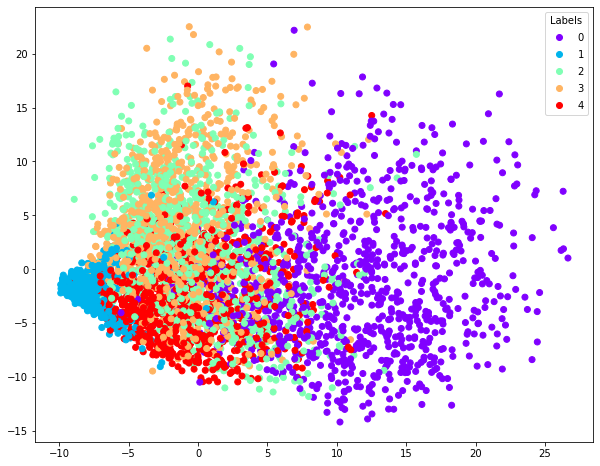

In [ ]:
from sklearn import decomposition

pca = ?????????
reduced_X = ?????????

color_num = 5

plt.rcParams['figure.figsize'] = [10, 8]
xs = reduced_X[:,0]
ys = reduced_X[:,1]

scatter = plt.scatter(xs, ys, c=list(map(int, T_train)), cmap=plt.get_cmap('rainbow', color_num))
legend = plt.legend(*scatter.legend_elements(), loc='upper right', title='Labels')

plt.show()

In [ ]:
# TSNE for visualization, it takes about a minute
model = TSNE(learning_rate=300, random_state=1)
TSNE_X_red = model.fit_transform(reduced_X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


## Step 2-1. K-means with reduced input


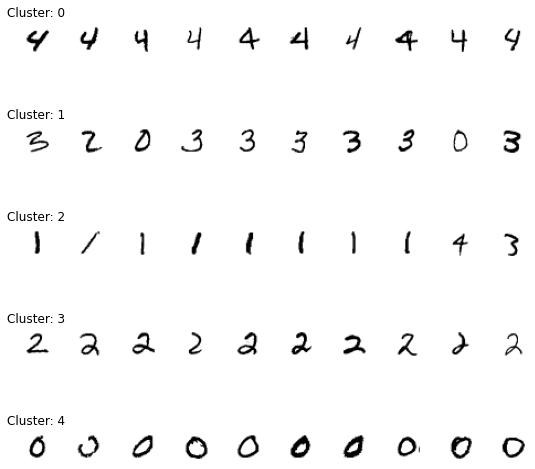

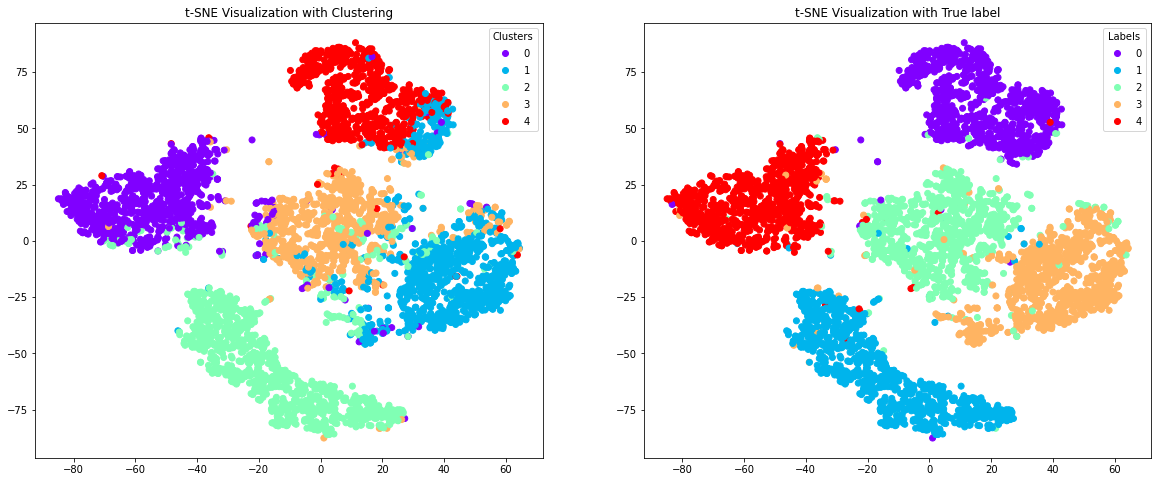

In [ ]:
n = 5 # number of clusters
############ start your code here #################
# Use a variable 'reduced_X' for input
model =?????????
Y_train = ?????????
###################################################

img_plt(X_train, Y_train, n) # plot
vec_vis(TSNE_X_red, Y_train, T_train, n) # visualize

## Step 2-2. Agglomerative Clustering with reduced input

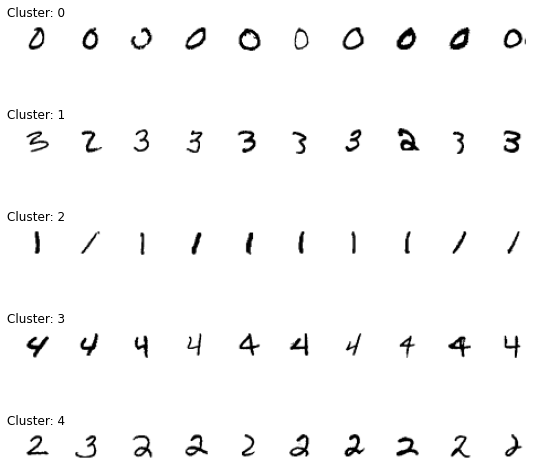

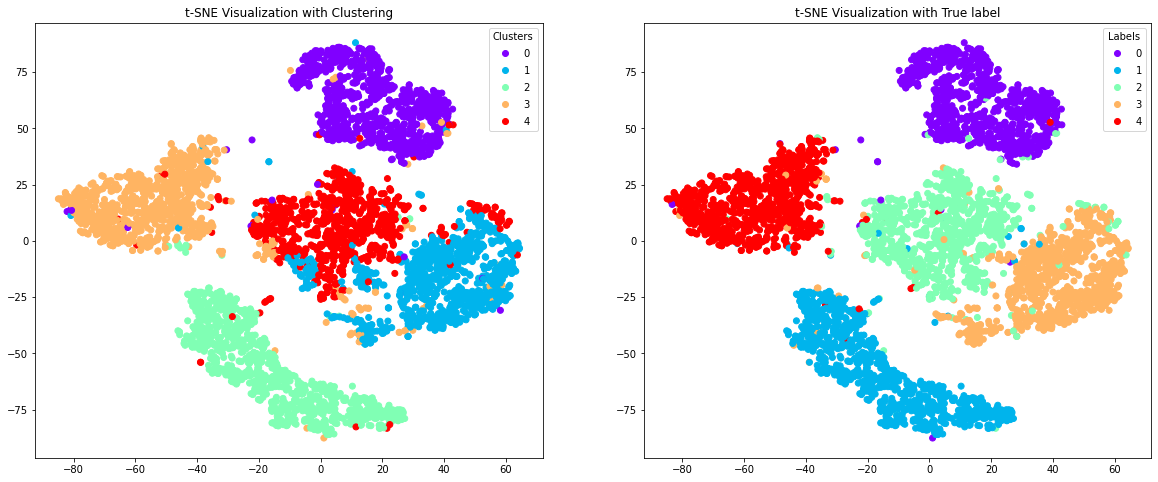

In [ ]:
n = 5 # number of clusters
############ start your code here #################
# Use a variable 'reduced_X' for input
model =?????????
Y_train =?????????
###################################################

img_plt(X_train, Y_train, n) # plot
vec_vis(TSNE_X_red, Y_train, T_train, n) # visualize

## Optional. DBSCAN (Density-based spatial clustering of applications with noise) 
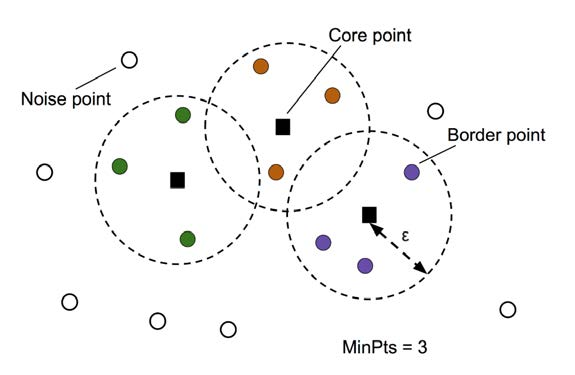


In DBSCAN algorithm, we do not input the number of clusters. Instead, we use $ε$ and MinPts. It means that choosing appropiate value of those is really critical for DBSCAN. Let's try if you have some time.



### Optional-1. Cluster MNIST original data using DBSCAN

Number of clusters:  4
Number of noise points:  2396


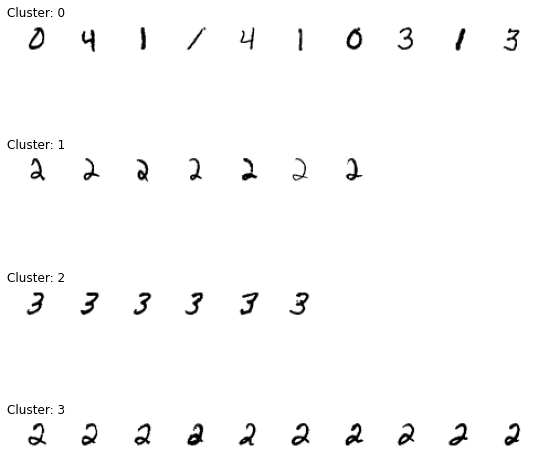

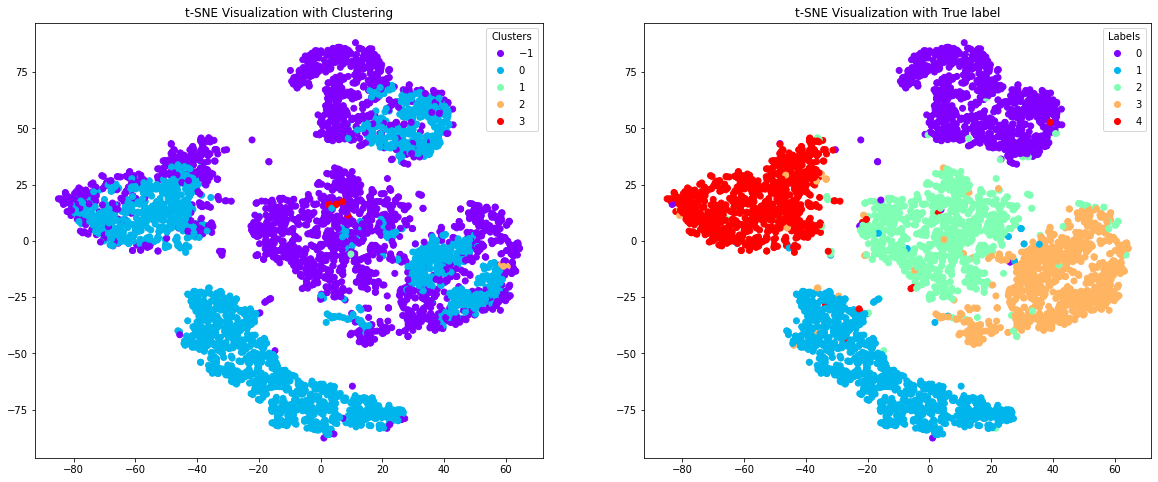

In [ ]:
############ try other values for eps and min_sample #################
model = ?????????
Y_train = ?????????
######################################################################

labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # number of clusters
n_noise_ = list(labels).count(-1) # number of noise points, '-1' means noise
n = n_clusters_

print("Number of clusters: ", n_clusters_)
print("Number of noise points: ", n_noise_)

img_plt(X_train, Y_train, n)
vec_vis(TSNE_X_red, Y_train, T_train, n+1)

## Optional-2. Cluster synthetic data using DBSCAN

As you see, MNIST data which is not well-clustered with density based clustering algorithms. So, we will try again with synthetic data and compare DBSCAN with other clutering algorithms.

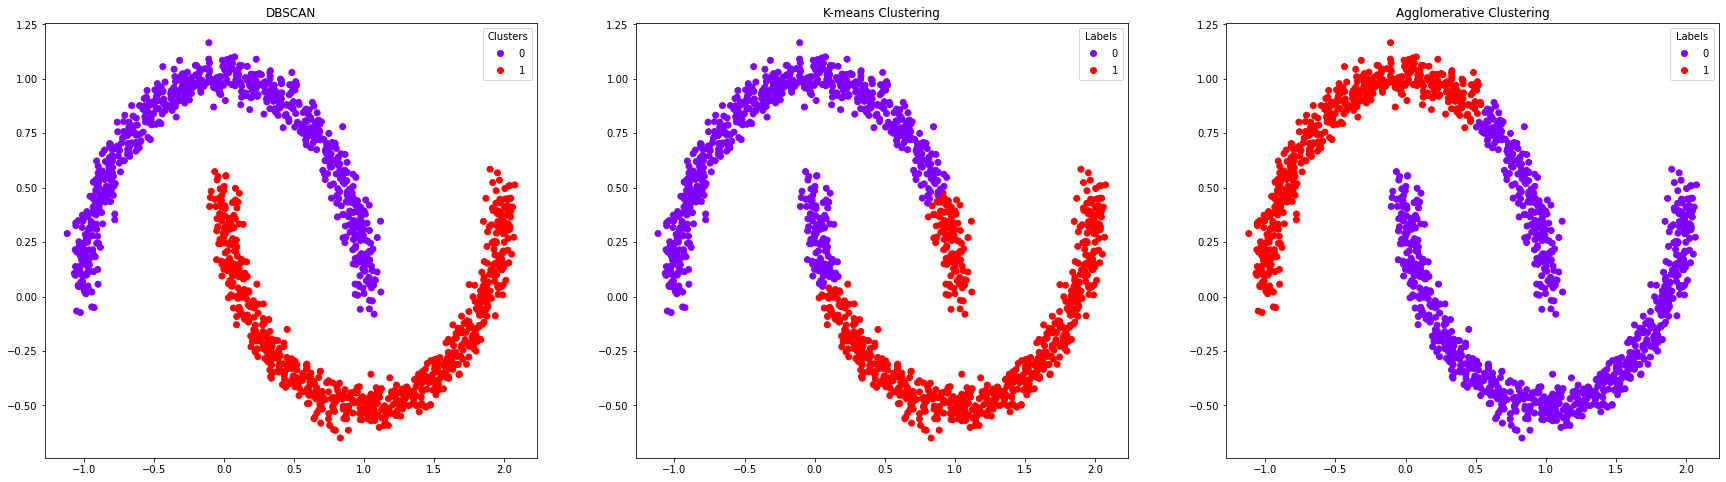

In [ ]:
from sklearn import datasets

np.random.seed(1)
noisy_moons = datasets.make_moons(n_samples=1500, noise=.05)

X_train2, T_train2 = noisy_moons

# Scaling data
### 실습 : 입력은 Scaling 한다. 
scaler2 = ??????
X_train_s2 = ??????

### DBSCAN 의 결과를 구한다
model2 = ??????
Y_train2_d = ??????


### 실습 : KMeans 결과를 구한다
model2 = ??????
Y_train2_k = ??????


### Agglomerative의 결과를 구한다. 
model2 = ???
Y_train2_a = ???

plt.rcParams['figure.figsize'] = [30, 8]
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

xs = X_train2[:,0]
ys = X_train2[:,1]
ax1.set_title("DBSCAN")
### 실습 : Cluster에 색깔을 입혀서 출력한다
scatter =?????
legend = ax1.legend(*scatter.legend_elements(), loc='upper right', title='Clusters')

### 실습 : Cluster에 색깔을 입혀서 출력한다
ax2.set_title("K-means Clustering")
scatter = ????
legend = ax2.legend(*scatter.legend_elements(), loc='upper right', title='Labels')

### 실습 : Cluster에 색깔을 입혀서 출력한다
ax3.set_title("Agglomerative Clustering")
scatter = ?????
legend = ax3.legend(*scatter.legend_elements(), loc='upper right', title='Labels')

plt.show()

MNIST Clustering : https://github.com/yoonkt200/recommender-system/blob/master/deprecated/clustering/mnist-example.ipynb

K-means Clustering : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=k%20means#sklearn.cluster.KMeans

Agglomerative Clustering : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglomerative#sklearn.cluster.AgglomerativeClustering

DBSCAN : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Optional-2 : https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

Figure : Raschkaand and Mirjalili